# Multilabel Classification Implementation in Python

## The Example

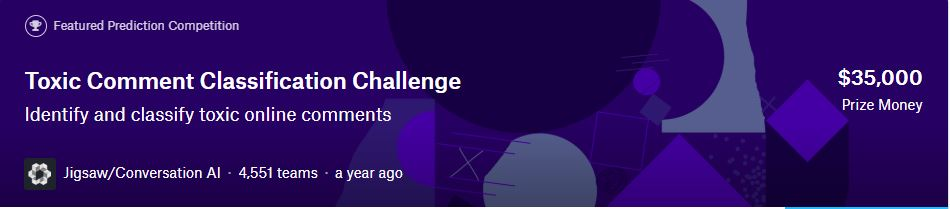

In [2]:
from IPython.display import Image
Image("IMG/kaggle_image.JPG")

## Importing necessary libraries

In [52]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import spacy
from sklearn.metrics import accuracy_score, f1_score

## Data Preparation

In [41]:
data = pd.read_csv(r'data\jigsaw-toxic-comment-classification-challenge\train.csv')
train, test = train_test_split(data, test_size=0.3, random_state=94)

In [42]:
#get the text data
X_train = train.loc[:,'comment_text']
X_test  = test.loc[:,'comment_text']

In [87]:
#extract y into seperate dataframe
y_train = train.loc[:,['obscene','insult','toxic','severe_toxic','identity_hate','threat']]
y_test = test.loc[:,['obscene','insult','toxic','severe_toxic','identity_hate','threat']]

In [44]:
print(y_train.columns.values)

['obscene' 'insult' 'toxic' 'severe_toxic' 'identity_hate' 'threat']


## Data Preprocessing

In [45]:
#cleaning the data
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [46]:
X_train = X_train.map(lambda x : clean_text(x))
X_test = X_test.map(lambda x : clean_text(x))

In [47]:
vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

## Multilabel Classification

### 1. Using scikit-learn package

### OneVsRestClassifier

In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression 

In [49]:
classifier = OneVsRestClassifier(LogisticRegression(solver='sag'))

In [50]:
classifier.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [51]:
pred1vR = classifier.predict(X_test)

In [60]:
print("Accuracy Score : " , accuracy_score(y_test, pred1vR))

Accuracy Score :  0.9187416443850267


### 2. Using scikit-ml package

### Classifier Chains

#### Importing library

In [78]:
from skmultilearn.problem_transform import ClassifierChain

In [83]:
classifier = ClassifierChain(classifier=LogisticRegression(), require_dense=[False, True])

In [89]:
classifier.fit(X_train, y_train)

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        order=None, require_dense=[False, True])

In [90]:
predCC = classifier.predict(X_test)

In [91]:
print("Accuracy Score : " , accuracy_score(y_test, predCC))

Accuracy Score :  0.9184283088235294


### Label Powerset

#### Importing library

In [92]:
from skmultilearn.problem_transform import LabelPowerset

In [93]:
classifier = LabelPowerset(classifier=LogisticRegression(), require_dense=[False, True])

In [94]:
classifier.fit(X_train,y_train)

C:\Users\wanmaflah.mzubi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LabelPowerset(classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       require_dense=[False, True])

In [95]:
predLP = classifier.predict(X_test)

In [97]:
print("Accuracy Score : " , accuracy_score(y_test, predLP))

Accuracy Score :  0.91485628342246


### Algorithm Adaptation

#### Example using MLkNN

In [98]:
from skmultilearn.adapt import MLkNN

#### Preparing data for adapted algorithms

Adapt library expects data in the form of either numpy array or compressed sparse row matrix

##### First Approach

Convert using lil_matrix to construct the sparse matrices

In [115]:
from scipy.sparse import csr_matrix, lil_matrix
y_trainCSR = lil_matrix(y_train).toarray()

##### Second Approach

Convert using OneHotEncoder from scikit-learn; will output numpy array

In [105]:
from sklearn.preprocessing import OneHotEncoder
onc = OneHotEncoder()
y_trainONC = onc.fit_transform(y_train)

C:\Users\wanmaflah.mzubi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [99]:
classifier = MLkNN(k=10)

In [ ]:
classifier.fit(X_train,y_trainAA)

In [112]:
predMLKNN = classifier.predict(X_test)

numpy.ndarray

In [113]:
print("Accuracy Score : " , accuracy_score(y_test, predMLKNN))

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)